# 1. Take grayscale image of size 512x512 and perform the following operations -

#(a) Decrease its spatial resolution by half every time and observe its change when displaying in the same window size

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import numpy as np

## Load Image

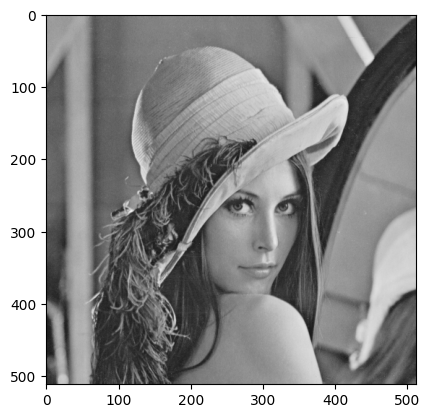

In [ ]:
original_img = cv2.imread("Lenna-gray.bmp")
original_img = cv2.resize(original_img, (512, 512))
plt.imshow(original_img, cmap = 'gray')
plt.show()

In [ ]:
height, width, _ = original_img.shape
img = original_img.copy()

In [ ]:
def downSampling(dec):
  new_img = []

  for i in range(0, height, dec):
    temp_row = []
    for j in range(0, width, dec):
      temp_row.append(img[i][j])

    new_img.append(temp_row)
  new_img = np.array(new_img)
  return new_img

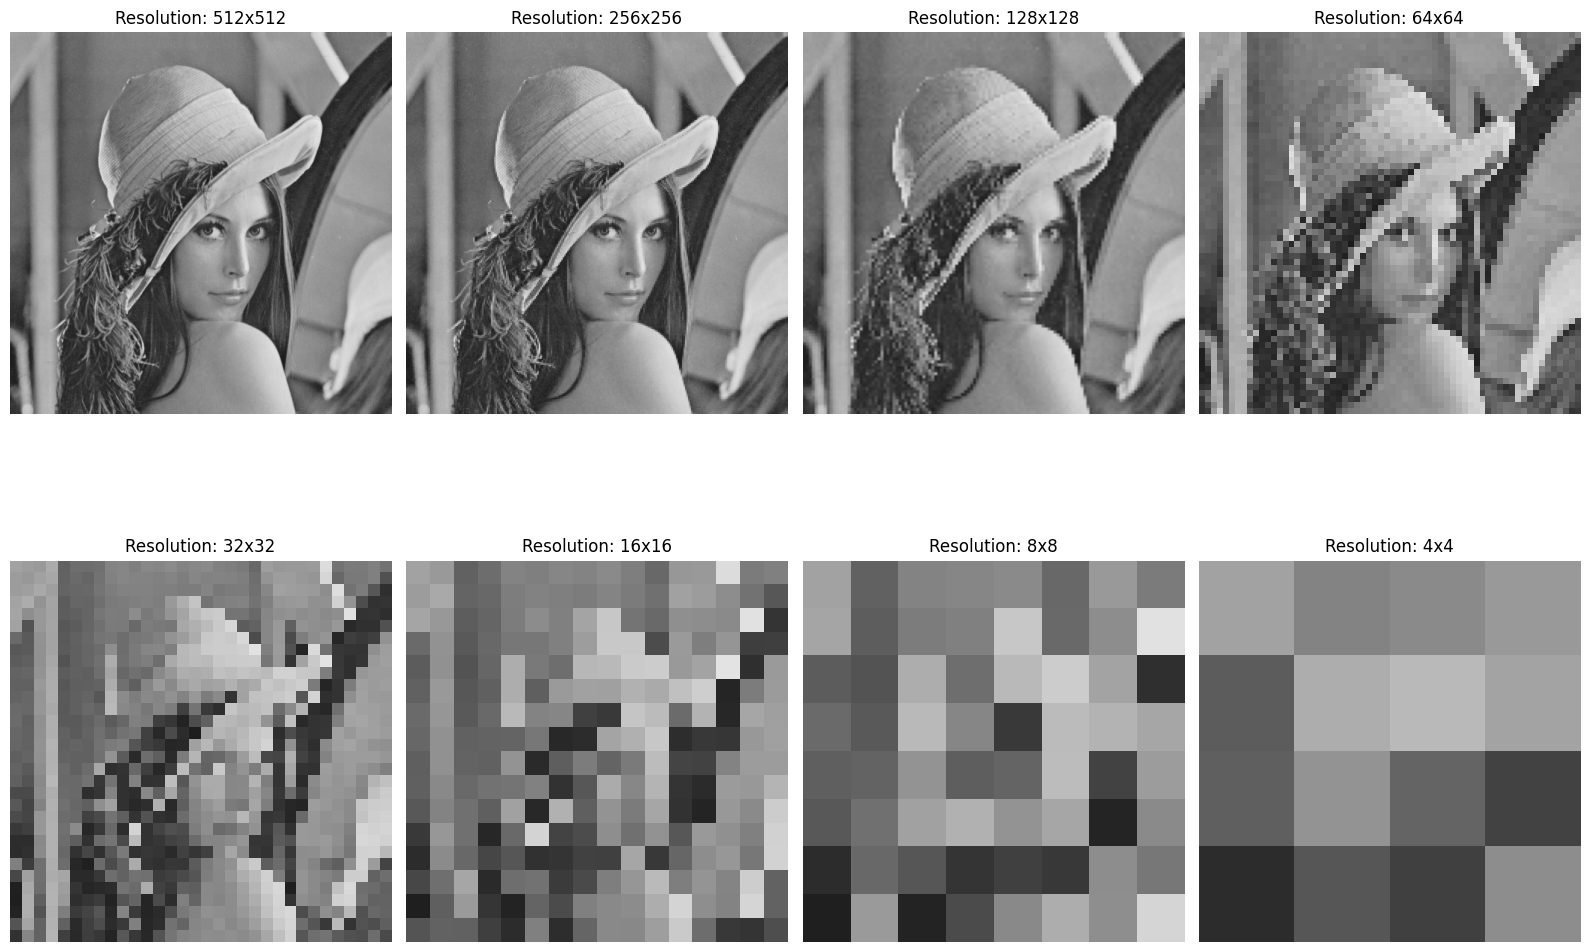

In [ ]:

plt.figure(figsize = (16, 12))

for i in range(1, 9):
  plt.subplot(2, 4, i)
  x = downSampling(2 ** (i - 1))
  if len(x.shape) == 3:
    h, w, _ = x.shape  # unpack height, width, and ignore channels
  else:
    h, w = x.shape
  plt.title(f"Height: {h}, Width: {w}")
  plt.title(f"Resolution: {h}x{w}")
  plt.axis('off')
  plt.imshow(x, cmap = "gray")

plt.tight_layout()
plt.show()

#(b) Decrease it intensity level resolution by one bit up to reach its binary format observe its change when displaying in the same window size


## Decrease intensity level Resolution by 1-Bit

In [ ]:
def dec_res(img, num_bits):
  step = 255 / (2 ** num_bits - 1)
  print(step)
  if len(img.shape) == 3:
    height, width, _ = img.shape
  else:
    height, width = img.shape
  dec_img = img.copy()

  for i in range(height):
    for j in range(width):
      dec_img[i][j] = np.round(dec_img[i][j] / step) * step

  return dec_img

1.0
2.0078740157480315
4.0476190476190474
8.225806451612904
17.0
36.42857142857143
85.0
255.0


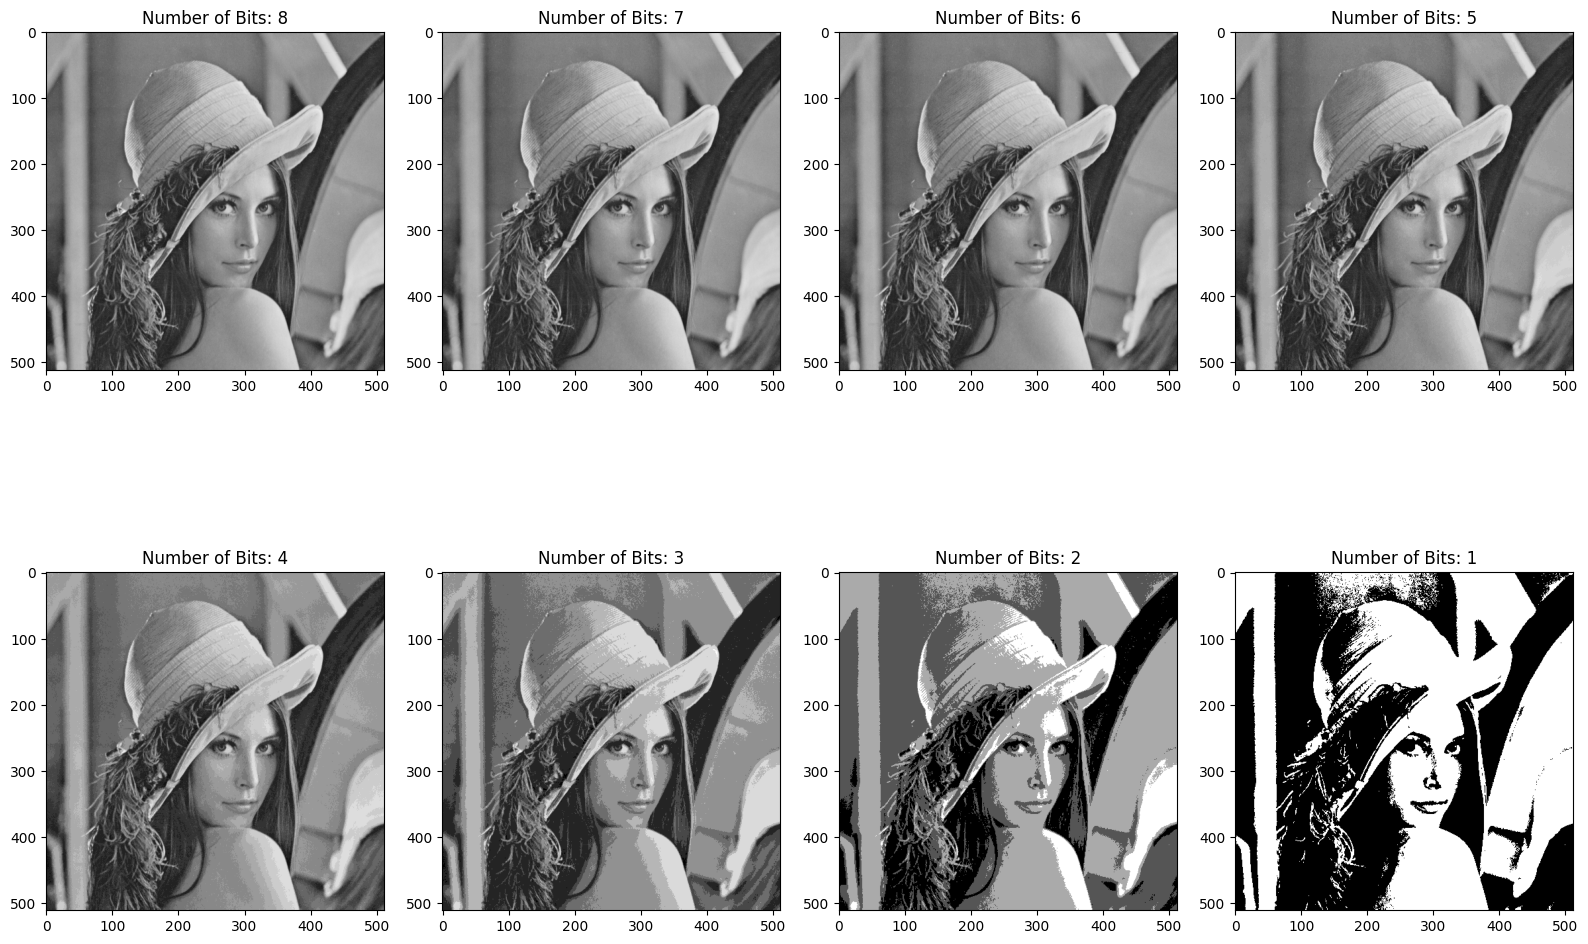

In [ ]:
dec_img = original_img.copy()
plt.figure(figsize = (16, 12))

for i in range(1, 9):
  plt.subplot(2, 4, i)
  num_bits = 9 - i
  dec_img = dec_res(dec_img, num_bits)
  plt.title(f"Number of Bits: {num_bits}")
  # plt.axis('off')
  plt.imshow(dec_img, cmap = "gray")

plt.tight_layout()
plt.show()

#(c) Illustrate the histogram of the image and make single threshold segmentation observed from the histogram

In [ ]:
def generate_histogram(img):
  histogram = np.zeros(256)
  height, width, _ = img.shape
  for r in range(height):
    for c in range(width):
      histogram[img[r][c]] += 1

  return histogram

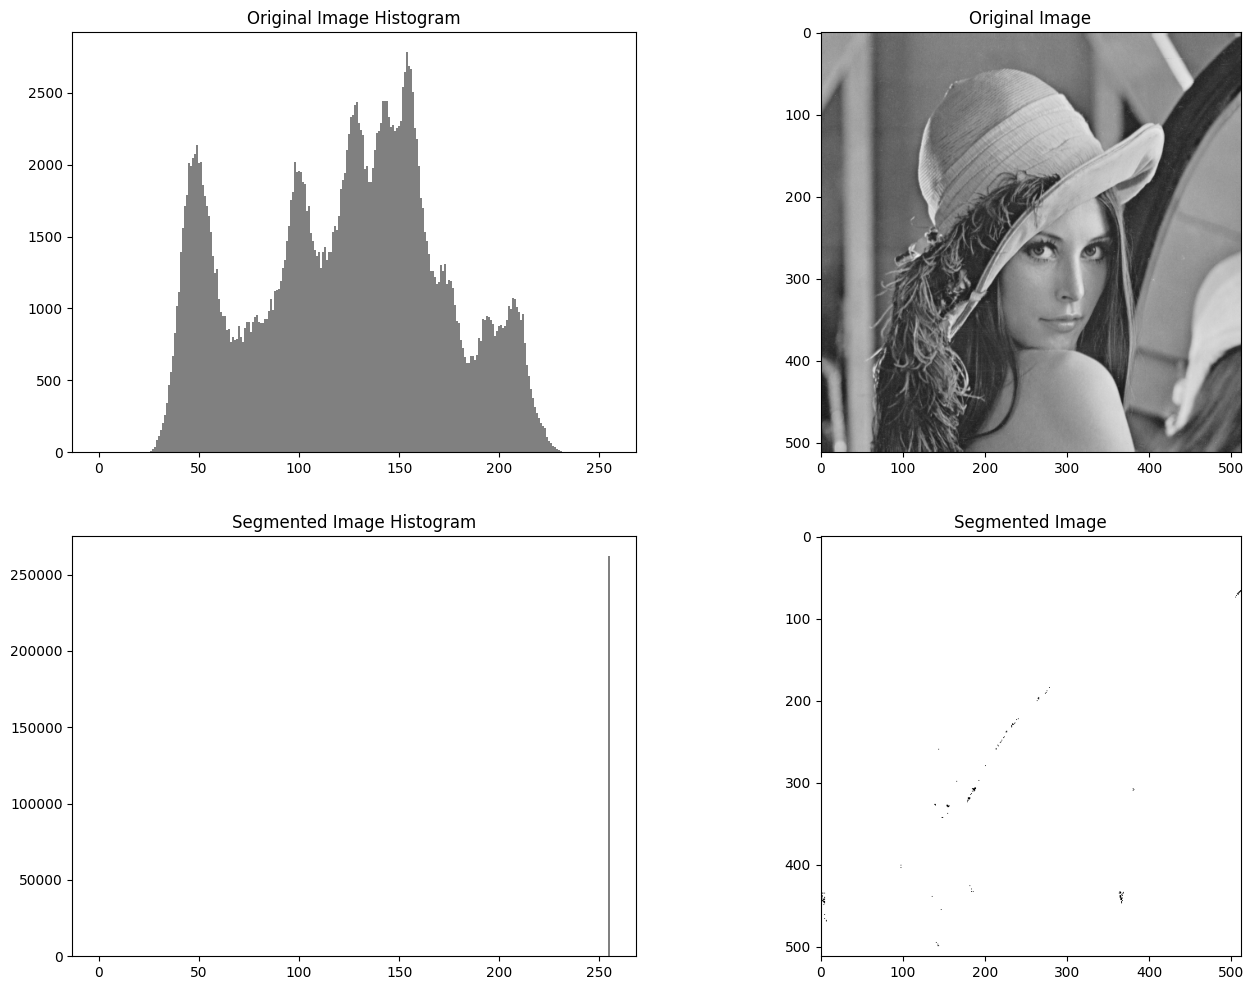

In [ ]:
histogram = generate_histogram(original_img)
plt.figure(figsize = (16, 12))
plt.subplot(2, 2, 1)
plt.title(f'Original Image Histogram')
plt.bar(range(256), histogram, color = 'gray', width = 1.0)
plt.subplot(2, 2, 2)
plt.title(f'Original Image')
plt.imshow(original_img, cmap = 'gray')

threshold = 30;

segmented_img = np.where(original_img >= threshold, 255, 0)
segmented_histogram = generate_histogram(segmented_img)
plt.subplot(2, 2, 3)
plt.title(f'Segmented Image Histogram')
plt.bar(range(256), segmented_histogram, color = 'gray', width = 1.0)
plt.subplot(2, 2, 4)
plt.title(f'Segmented Image')
plt.imshow(segmented_img, cmap = 'gray')


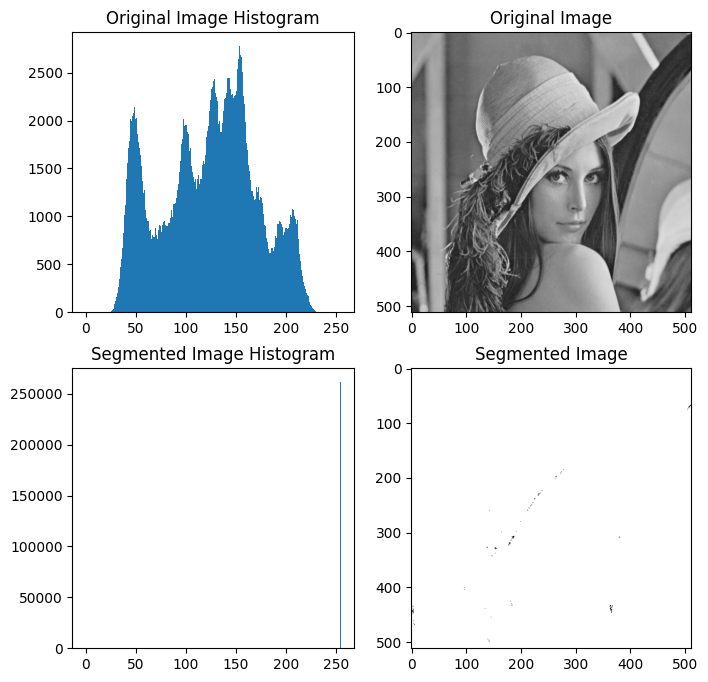

In [ ]:
img_gray = original_img.copy()
plt.figure(figsize=(8, 8))
gray_level_counts = generate_histogram(img_gray)
plt.subplot(2, 2, 1)
plt.title(f"Original Image Histogram")
plt.bar(range(256), gray_level_counts, width=1.0)
plt.subplot(2, 2, 2)
plt.title(f"Original Image")
plt.imshow(img_gray, cmap="gray")

threshold_value = 30

segmented_gray_img = np.where(img_gray >= threshold_value, 255, 0)
segmented_gray_level_counts = generate_histogram(segmented_gray_img)
plt.subplot(2, 2, 3)
plt.title(f"Segmented Image Histogram")
plt.bar(range(256), segmented_gray_level_counts, width=1.0)
plt.subplot(2, 2, 4)
plt.title(f"Segmented Image")
plt.imshow(segmented_gray_img, cmap="gray")